In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [22]:
#!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [23]:
from google.colab import files
uploaded = files.upload()

Saving usd-inr.csv to usd-inr.csv


In [24]:
import io
df = pd.read_csv(io.BytesIO(uploaded['usd-inr.csv']))

In [25]:
df = pd.read_csv('usd-inr.csv', index_col='DATE', parse_dates=True)

<ipython-input-25-f8b96e1ce8fe>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('usd-inr.csv', index_col='DATE', parse_dates=True)


<Axes: xlabel='DATE'>

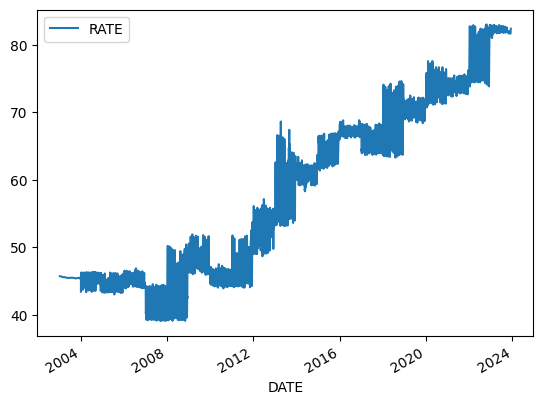

In [26]:
df.plot()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5096 entries, 2003-01-12 to 2023-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RATE    5096 non-null   float64
dtypes: float64(1)
memory usage: 79.6 KB


In [28]:
adfuller(df['RATE'])  # 1st two values are test statistics and p value
                            # check documentation of statsmodels
                            # 13 is no of lags used
                            # 130 no of observation used for ADF regression & calculation of critical value

(0.2090777935028955,
 0.9727661683057442,
 25,
 5070,
 {'1%': -3.43164045639809,
  '5%': -2.862110243918375,
  '10%': -2.5670735412314385},
 1495.2335054959294)

In [29]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistics: ",res[0])
  print("P-value: ",res[1])
  if res[1] < .05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [30]:
adf(df['RATE'])

Test-Statistics:  0.2090777935028955
P-value:  0.9727661683057442
Non-Stationary


In [31]:
adf(np.random.random(100)) # let's test wheather or not this function works for an actual stationary signal
                           # so taking IID noice from normal sample (strong stationary) so we get very small p-value

Test-Statistics:  -7.9361637835990155
P-value:  3.409101207467343e-12
Stationary


In [32]:
adf(np.random.gamma(1,1,100))

Test-Statistics:  -7.598471563810207
P-value:  2.4246803022827018e-11
Stationary


In [33]:
df['LogRATE'] = np.log(df['RATE'])

In [35]:
adf(df['LogRATE'])

Test-Statistics:  -0.14121914337092933
P-value:  0.9451750162429128
Non-Stationary


In [37]:
df['Diff'] = df['RATE'].diff()

<Axes: xlabel='DATE'>

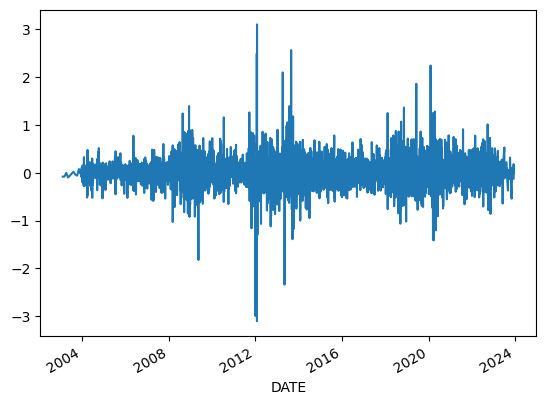

In [38]:
df['Diff'].plot()   # As variance increases with time so non-Stationary

In [39]:
adf(df['Diff'].dropna())  #note p value is very close to .05

Test-Statistics:  -12.404822406315603
P-value:  4.476847099082362e-23
Stationary


In [40]:
df['DiffLog'] = df['LogRATE'].diff() #1st difference of log passanger

<Axes: xlabel='DATE'>

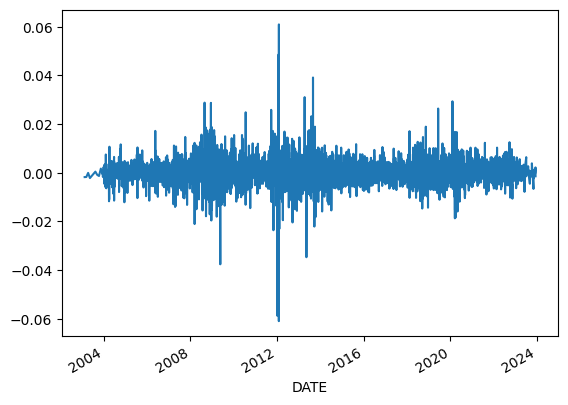

In [41]:
df['DiffLog'].plot()  # variance not varing woth time and more stationry than raw 1st difference

In [42]:
adf(df['DiffLog'].dropna())  # Run adf test on difflog coloumn
 # dropna() mean drop 1st value
 # suprisingly we get higher p-value than in when variance was increasing

Test-Statistics:  -11.841219224383815
P-value:  7.5816325686982315e-22
Stationary


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

In [ ]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [ ]:
stocks.head()

In [ ]:
stocks.info()

In [ ]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]  # grb all rows where the name is equal to Googs and we are going to grab the close coloumn


In [ ]:
goog['LogPrice'] = np.log(goog['Close']) #take the log of the close,call him to get the log price

In [ ]:
goog['LogRet'] = goog['LogPrice'].diff() # taking 1st difference of logPrice coloumn to get log return

In [ ]:
goog['LogPrice'].plot()   #Plot logprice as a time series
 #there is a trend

In [ ]:
goog['LogRet'].plot() # plot log return  it is pretty stationary

In [ ]:
adf(goog['LogPrice'])  # adf on logprice

In [ ]:
adf(goog['LogRet'].dropna())  # adf on lofprice 1st difference

In [ ]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]  # grb all rows where the name is equal to SBUX and we are going to grab the close coloumn
sbux['LogPrice'] = np.log(sbux['Close']) #take the log of the close,call him to get the log price
sbux['LogRet'] = sbux['LogPrice'].diff() # taking 1st difference of logPrice coloumn to get log return


In [ ]:
goog['LogPrice'].plot()

In [ ]:
goog['LogRet'].plot() # plot log return  it is pretty stationary

In [ ]:
adf(sbux['LogPrice'])

In [ ]:
adf(sbux['LogRet'].dropna())